# Exercises Lecture 12: Topic Modeling (Gensim)

In this notebook, we use LDA to perform topic modeling on a corpus of Wikipedia articles from 16 categories:

Airports, Artists, Astronauts, Astronomical_objects, Building,City,Comics_characters, Companies,Foods, Monuments_and_memorials,Politicians,Sports_teams,Sportspeople, Transport, Universities_and_colleges, Written_communication..

The assignment involves the following steps:

* Preparing the data  
* Training an LDA model
* Interpreting the results of the LDA model
   - Printing out the topk relevant tokens for each topic
   - Computing coherence
   - Visualising the topic graph

Data: wkp_sorted.zip      

Python libraries
- sklearn.datasets to load data 
- pandas
- WordCloud
- gensim for topic modeling  

Cheat sheets
- clustering_cheat_sheet.ipynb   
- topic_modeling_cheat_sheet.ipynb
 

#### Installing dependent packages

In [1]:
# To be run only once
#!pip install gensim
!pip install PyLDAvis
#!pip install spacy
#!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.2 MB/s eta 0:00:00m eta 0:00:0100:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.0/381.0 KB 14.3 MB/s eta 0:00:00
  Created wheel for PyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136900 sha256=a473314f5e18fa1ea8599d392cca6af87076b37f9d459ee0fbaf4520cc667989
  Stored in directory: /home/chankevin/.cache/pip/wheels/e9/95/74/4766157910829d2fbc6b913850a62cfd15da77a199302cdf9c
Successfully built PyLDAvis


## Generating a word cloud

**Exercise 1** 

* Create a pandas dataframe containing a column for the text of each Wikipedia article included in  "wkp_sorted/". 
* Use sklearn.datasets load_files method (cf. clustering CS) 

In [39]:
import pandas as pd
import sklearn
import re
import numpy as np
from sklearn import datasets
import spacy
nlp = spacy.load("en_core_web_sm")
import nltk
from nltk.corpus import stopwords
import gensim

In [14]:
def get_title(i:int, categories:list):
    return categories[i]

In [15]:
corpus = datasets.load_files('data/wkp_sorted/' , encoding="utf-8", decode_error="replace")
df = pd.DataFrame({'text' : corpus.data, 'label': corpus.target})
df['label']= df['label'].apply(lambda x: get_title(int(x),corpus.target_names) )
df

,text,label
0,The Cardiff Roller Collective (CRoC) are a rol...,Sports_teams
1,"""Go! Pack Go!"" is the fight song of the Green ...",Sports_teams
2,Al-Machriq (English translation: The East) was...,Universities_and_colleges
3,Ajman International Airport (Arabic: مطار عجما...,Airports
4,Kapla is a construction set for children and a...,Building
...,...,...
155,Memphis Air Route Traffic Control Center (ZME)...,Airports
156,Al-Haj Suliman Yari (19 August 1936 – 10 May 2...,Politicians
157,Sapphire Stagg is a fictional character appear...,Comics_characters
158,Relocation of professional sports teams occurs...,Sports_teams


**Exercise 2:** Generate a word cloud (topic_modeling CS)

* The WordCloud method takes as input the corpus as a single string. 
* Use pandas str.cat method to concatenate the content of the "story_str" column into a single string

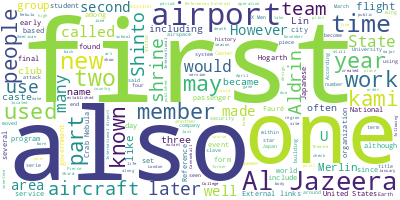

In [18]:
# Import the wordcloud library
from wordcloud import WordCloud
en_stopwords = stopwords.words('english')

text_content= df['text'].str.cat(sep=" ")
          
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=3, 
                      contour_color='steelblue',stopwords = en_stopwords )

# Generate a word cloud
wordcloud.generate(text_content)

# Visualize the word cloud
wordcloud.to_image()

## Pre-processing the data

**Exercise 3:** Preparing the corpus for topic modeling

Gensim topic modeling module takes as input a list of tokens.

 - Define a clean_up function which takes as input a list of texts and outputs the list of lemmas for tokens in the input which :
* are not stop words  (spacy CS)
* only contains characters (python_basic CS) 
* whose length is greater than 2
* whose spacy POS tag is not 'ADV','PRON','CCONJ','PUNCT','PART','DET','ADP'or 'SPACE'  (spacy CS)

- Apply this function to the 'text' column of the Wikipedia dataframe (cf. Ex. 1 and 2)   
_**Help**_ : use pandas apply method

In [29]:
import string

def tokenization(file):
    tokens = [word for word in file if len(word)>2]
    return tokens

def translate(s):
    punc = string.punctuation
    dict_punc = {p : '' for p in punc}
        
    ttab = str.maketrans(dict_punc)
    return s.translate(ttab)

def to_lowercase(s):
    return s.lower()

def pos_tagging(nlp_sentence):
    spacy_pos_tagged = [(token, token.tag_, token.pos_) for token in nlp_sentence]
    return spacy_pos_tagged

def sentences(file):
    return [s for s in file.sents]

def remove_stop_words(tokens_list):
    stop_words_list = stopwords.words('english')
    for token in tokens_list:
        if token in stop_words_list:
            #print(token)
            tokens_list.remove(token)
    return tokens_list

 
def clean_up(text_list:list):
    not_accepted_POS = {'ADV','PRON','CCONJ','PUNCT','PART','DET','ADP', 'SPACE'}
    content = ''.join(text_list)
    nlp_content = nlp(content)
    token = [token.text for token in nlp_content if token.pos_ not in not_accepted_POS and len(token)>2]
    tokens = [translate(to_lowercase(str(x))) for x in token ]
    tokens = remove_stop_words(tokens)
    return tokens

df['tokens']= df['text'].apply(lambda x: clean_up(list(x))) 
df
    

,text,label,tokens
0,The Cardiff Roller Collective (CRoC) are a rol...,Sports_teams,"[cardiff, roller, collective, croc, roller, sp..."
1,"""Go! Pack Go!"" is the fight song of the Green ...",Sports_teams,"[pack, fight, song, green, bay, packers, first..."
2,Al-Machriq (English translation: The East) was...,Universities_and_colleges,"[machriq, english, translation, east, journal,..."
3,Ajman International Airport (Arabic: مطار عجما...,Airports,"[ajman, international, airport, arabic, مطار, ..."
4,Kapla is a construction set for children and a...,Building,"[kapla, construction, set, children, adults, s..."
...,...,...,...
155,Memphis Air Route Traffic Control Center (ZME)...,Airports,"[memphis, air, route, traffic, control, center..."
156,Al-Haj Suliman Yari (19 August 1936 – 10 May 2...,Politicians,"[haj, suliman, yari, august, 1936, may, 2013, ..."
157,Sapphire Stagg is a fictional character appear...,Comics_characters,"[sapphire, stagg, fictional, character, appear..."
158,Relocation of professional sports teams occurs...,Sports_teams,"[relocation, professional, sports, teams, occu..."


## Learn a topic model

**Exercise 4:** Create a vocabulary for the lda model and convert your list of list of lemmas into a document-term matrix

* Use [Gensim dictionary method](https://radimrehurek.com/gensim/corpora/dictionary.html) to create a dictionary 
* Use Gensim doc2bow method (from Corpora module) to convert each synopsis to a list of integers

In [37]:
import gensim.corpora as corpora

dic = corpora.Dictionary(df['tokens'])
print(dic)
#print(dic.token2id)

Dictionary(18739 unique tokens: ['2009', '2010', '2011', '2011by', '2012']...)


In [ ]:
doc_token_matrix = [dic.doc2bow(text) for text in df['tokens']]
doc_token_matrix

**Exercise 5:** Create an LDA model with 16 topics and apply it to your data

In [67]:
lda_model = gensim.models.LdaMulticore(corpus=doc_token_matrix,
                                       id2word=dic,
                                       num_topics=16, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

**Exercise 6:** Print out the keywords of the 16 topics (Airports, Artists, Astronauts, Astronomical_objects, Building,City,Comics_characters, Companies,Foods, Monuments_and_memorials,Politicians,Sports_teams,Sportspeople, Transport, Universities_and_colleges, Written_communication)


Each topic is a combination of keywords.

* Use `lda_model.print_topics()` to see the keywords for each topic and the weight of each keyword for that topic
* Retrain you LDA model with different numbers of topics and examine the top keywords to determine which number of topics is best
* Can you match the topics to the Wikipedia categories ?

In [42]:
from pprint import pprint
# Print the Keywords in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.012*"shinto" + 0.011*"kami" + 0.007*"lin" + 0.006*"burial" + '
  '0.006*"shrines" + 0.005*"japanese" + 0.005*"japan" + 0.004*"open" + '
  '0.004*"natural" + 0.004*"known"'),
 (1,
  '0.018*"club" + 0.009*"moved" + 0.007*"stadium" + 0.007*"football" + '
  '0.007*"league" + 0.007*"cement" + 0.006*"home" + 0.005*"ground" + '
  '0.005*"team" + 0.005*"new"'),
 (2,
  '0.014*"fauré" + 0.009*"check" + 0.007*"st" + 0.006*"piano" + 0.006*"first" '
  '+ 0.005*"piece" + 0.005*"major" + 0.004*"nocturne" + 0.004*"university" + '
  '0.004*"theme"'),
 (3,
  '0.031*"jazeera" + 0.007*"media" + 0.006*"government" + 0.005*"organization" '
  '+ 0.004*"channel" + 0.004*"said" + 0.004*"israel" + 0.004*"news" + '
  '0.004*"qatar" + 0.004*"coverage"'),
 (4,
  '0.009*"dyson" + 0.008*"caldwell" + 0.005*"toriyama" + 0.005*"space" + '
  '0.005*"university" + 0.005*"flight" + 0.005*"japanese" + 0.004*"nasa" + '
  '0.004*"award" + 0.004*"mission"'),
 (5,
  '0.022*"aldrin" + 0.017*"merlin" + 0.005*"apollo" +

In [48]:
for i in range(1,17):
    lda_model = gensim.models.LdaMulticore(corpus=doc_token_matrix,
                                       id2word=dic,
                                       num_topics=i, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    print('Number of topics: {}'.format(i))
    pprint(lda_model.print_topics())

Number of topics: 1
[(0,
  '0.003*"first" + 0.003*"airport" + 0.003*"been" + 0.003*"one" + '
  '0.002*"jazeera" + 0.002*"new" + 0.002*"people" + 0.002*"two" + 0.002*"time" '
  '+ 0.002*"may"')]
Number of topics: 2
[(0,
  '0.005*"shinto" + 0.004*"kami" + 0.003*"first" + 0.003*"lin" + '
  '0.003*"japanese" + 0.002*"burial" + 0.002*"world" + 0.002*"been" + '
  '0.002*"one" + 0.002*"shrines"'),
 (1,
  '0.005*"airport" + 0.004*"jazeera" + 0.003*"been" + 0.003*"one" + '
  '0.003*"first" + 0.003*"airspace" + 0.003*"people" + 0.003*"new" + '
  '0.003*"aircraft" + 0.002*"aldrin"')]
Number of topics: 3
[(0,
  '0.005*"jazeera" + 0.005*"shinto" + 0.004*"kami" + 0.004*"people" + '
  '0.004*"been" + 0.003*"lin" + 0.003*"first" + 0.003*"world" + '
  '0.002*"japanese" + 0.002*"burial"'),
 (1,
  '0.005*"club" + 0.005*"merlin" + 0.003*"wing" + 0.003*"one" + 0.003*"pierce" '
  '+ 0.003*"aircraft" + 0.002*"new" + 0.002*"been" + 0.002*"moved" + '
  '0.002*"two"'),
 (2,
  '0.007*"airport" + 0.005*"airspace"

## Evaluate your model

**Exercise 7:** Compute Model Perplexity and Coherence Score

* A lower perplexity score indicates better generalization performance
* Coherence measures score a  topic by measuring the degree of semantic similarity between high scoring words in the topic.

1. `C_v` measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
2. `C_p` is based on a sliding window, one-preceding segmentation of the top words and the confirmation measure of Fitelson's coherence
3. `C_uci` measure is based on a sliding window and the pointwise mutual information (PMI) of all word pairs of the given top words
4. `C_umass` is based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure
5. `C_npmi` is an enhanced version of the C_uci coherence using the normalized pointwise mutual information (NPMI)
6. `C_a` is based on a context window, a pairwise comparison of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarit

**Visualize the topic model using pyLDAvis (PROVIDED)**

In [68]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_token_matrix, dic)
vis

/home/chankevin/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/home/chankevin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/chankevin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/chankevin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.008698 -0.054733       1        1  16.219144
8      0.051617 -0.133663       2        1   9.603934
3      0.023620 -0.128086       3        1   8.077645
15     0.137930 -0.012253       4        1   7.797015
6      0.019517 -0.062264       5        1   7.569936
2     -0.043866  0.144592       6        1   7.066389
5     -0.008598 -0.003164       7        1   7.049350
1     -0.073271 -0.021508       8        1   5.587537
9     -0.029249 -0.025430       9        1   5.547230
10    -0.088608  0.035214      10        1   5.146273
14     0.217710  0.129118      11        1   4.616821
11    -0.006644 -0.040545      12        1   4.406682
12    -0.062513  0.073987      13        1   3.763036
7     -0.036855  0.031225      14        1   2.580680
13    -0.033085  0.032779      15        1   2.531939
4     -0.059006  0.034733      16        1   2.436388, topic_info=               Term        Freq       Total Category  logprob  loglift
8715        jazeera  247.000000  247.000000  Default  30.0000  30.0000
218         airport  288.000000  288.000000  Default  29.0000  29.0000
220        airspace  156.000000  156.000000  Default  28.0000  28.0000
9113         aldrin  153.000000  153.000000  Default  27.0000  27.0000
6448         nebula  157.000000  157.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
1069           work    6.130629   95.602915  Topic16  -5.9482   0.9677
73            first    6.754716  283.920989  Topic16  -5.8512  -0.0238
681           years    5.593104  104.859903  Topic16  -6.0399   0.7836
1850         august    5.321962   47.006598  Topic16  -6.0896   1.5362
457   international    5.552986  147.686734  Topic16  -6.0471   0.4339

[946 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
6191       2  0.955371          1054
15052     11  0.907295          1200
7875      10  0.922152          1724
7887      10  0.820063          1736
829        2  0.138567          1929
...      ...       ...           ...
5122       9  0.893113       zaghawa
5124       9  0.818754         zarma
15638     12  0.854340           zog
11163     14  0.931422         ángel
5985       8  0.912631  židlochovice

[3009 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 9, 4, 16, 7, 3, 6, 2, 10, 11, 15, 12, 13, 8, 14, 5])

### Hyperparameter tuning (PROVIDED)

First, let's differentiate between model hyperparameters and model parameters :

- `Model hyperparameters` can be thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or in our case, number of topics K

- `Model parameters` can be thought of as what the model learns during training, such as the weights for each word in a given topic.

Now that we have the baseline coherence score for the default LDA model, let's perform a series of sensitivity tests to help determine the following model hyperparameters: 
- Number of Topics (K)
- Dirichlet hyperparameter alpha: Document-Topic Density
- Dirichlet hyperparameter beta: Word-Topic Density

We'll perform these tests in sequence, one parameter at a time by keeping others constant and run them over the two difference validation corpus sets. We'll use `C_v` as our choice of metric for performance comparison 

In [69]:
# supporting function
from gensim.models import CoherenceModel
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=doc_token_matrix,
                                           id2word=dic,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_token_matrix, dictionary=dic, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

Let's call the function, and iterate it over the range of topics, alpha, and beta parameter values

In [70]:
import numpy as np
import tqdm
import gensim


corpus = doc_token_matrix
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dic, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()


  4%|█▌                                        | 10/270 [00:56<24:16,  5.60s/it]
/home/chankevin/.local/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
/home/chankevin/.local/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
/home/chankevin/.local/lib/python3.10/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:198: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs

100%|█████████████████████████████████████████| 270/270 [23:51<00:00,  5.30s/it]


### Final Model Training

Based on external evaluation (Code to be added from Excel based analysis), train the final model

In [71]:
lda_model = gensim.models.LdaMulticore(corpus=doc_token_matrix,
                                           id2word=dic,
                                           num_topics=16, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [72]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('Perplexity:', lda_model.log_perplexity(doc_token_matrix))
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_token_matrix, dictionary=dic, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Perplexity: -8.959560474207585
Coherence Score:  nan
